In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from flopy.plot import styles as fps
import numpy as np

In [2]:
df = pd.read_csv('./Feedback on Decision Support Modelling with Python Self-Guided Course (Responses) - Form Responses 1.csv')

In [3]:
df.groupby('After this experience, would you prefer:').count()

,Timestamp,How much were you able to keep up with the self-study notebooks?,How comfortable were you with PEST++ before this class,How comfortable are you with PEST++ after this class,Please provide feedback that we can use to improve the GMDSI educational experience including the materials and the format and execution of this 5-week experience.
"After this experience, would you prefer:",,,,,
in-person intensive workshop (one week - ~40 hours),4,4,4,4,3
this hybrid self-guided approach with few online meetings (as we have experienced now),29,29,29,29,20


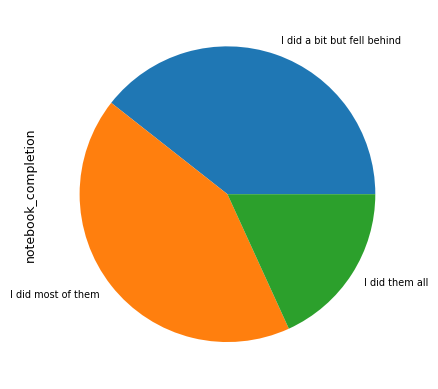

In [4]:
with fps.USGSPlot():
    df.groupby('How much were you able to keep up with the self-study notebooks?').count().rename(
    columns = {'Timestamp':'notebook_completion'}
    )['notebook_completion'].plot.pie()

In [5]:
inperson = df.groupby('After this experience, would you prefer:').count().rename(
    columns = {'Timestamp':'inperson'}
    )['inperson']/len(df)*100

In [6]:
inperson.index = [
    'In-person intensive\nworkshop\n(~40 hours)',
    'This hybrid self-guided\napproach with\nfew online meetings\n(as experienced now)'
]

In [7]:
nbs = df.groupby('How much were you able to keep up with the self-study notebooks?').count().rename(
    columns = {'Timestamp':'notebook_completion'}
    )['notebook_completion']/len(df)*100

In [8]:
nbs.index = ['I did a bit\nbut fell behind', 'I did most\nof them', 'I did\nthem all']

In [9]:
df.columns

Index(['Timestamp', 'After this experience, would you prefer:',
       'How much were you able to keep up with the self-study notebooks?',
       'How comfortable were you with PEST++ before this class',
       'How comfortable are you with PEST++ after this class',
       'Please provide feedback that we can use to improve the GMDSI educational experience including the materials and the format and execution of this 5-week experience.'],
      dtype='object')

In [10]:
before = df.groupby('How comfortable were you with PEST++ before this class'
          ).count()['Timestamp'].values
after = np.zeros(5)
after[1:-1] = df.groupby('How comfortable are you with PEST++ after this class'
          ).count()['Timestamp'].values

In [11]:
b4_aft_raw = pd.DataFrame(data={'Comfort Before Class':before,
                           'Comfort After Class':after})

In [12]:
before = df.groupby('How comfortable were you with PEST++ before this class'
          ).count()['Timestamp'].values/len(df)*100
after = np.zeros(5)
after[1:-1] = df.groupby('How comfortable are you with PEST++ after this class'
          ).count()['Timestamp'].values/len(df)*100

In [13]:
b4_aft = pd.DataFrame(data={'Comfort Before Class':before,
                           'Comfort After Class':after})
b4_aft.index = [i+1 for i in b4_aft.index]

In [14]:
df.groupby('How much were you able to keep up with the self-study notebooks?').count().rename(
    columns = {'Timestamp':'notebook_completion'}
    )['notebook_completion']

How much were you able to keep up with the self-study notebooks?
I did a bit but fell behind    13
I did most of them             14
I did them all                  6
Name: notebook_completion, dtype: int64

In [15]:
b4_aft.sum()

Comfort Before Class    100.0
Comfort After Class     100.0
dtype: float64

In [16]:
b4_aft_raw.sum()

Comfort Before Class    33.0
Comfort After Class     33.0
dtype: float64

In [17]:
df['comfort_delta'] = (df['How comfortable were you with PEST++ before this class'] - 
                           df['How comfortable are you with PEST++ after this class'])

In [18]:
df

,Timestamp,"After this experience, would you prefer:",How much were you able to keep up with the self-study notebooks?,How comfortable were you with PEST++ before this class,How comfortable are you with PEST++ after this class,Please provide feedback that we can use to improve the GMDSI educational experience including the materials and the format and execution of this 5-week experience.,comfort_delta
0,10/13/2023 8:29:39,this hybrid self-guided approach with few onli...,I did a bit but fell behind,3,2,NaN,1
1,10/13/2023 8:35:59,this hybrid self-guided approach with few onli...,I did a bit but fell behind,5,3,NaN,2
2,10/13/2023 8:46:13,in-person intensive workshop (one week - ~40 h...,I did most of them,3,2,NaN,1
3,10/13/2023 8:47:12,this hybrid self-guided approach with few onli...,I did them all,3,2,Specific to these workshops a bit more on pres...,1
4,10/13/2023 8:48:44,this hybrid self-guided approach with few onli...,I did them all,3,4,NaN,-1
5,10/13/2023 9:03:36,this hybrid self-guided approach with few onli...,I did most of them,3,2,NaN,1
6,10/13/2023 9:04:54,this hybrid self-guided approach with few onli...,I did a bit but fell behind,2,2,Subcutaneous administration,0
7,10/13/2023 9:07:06,this hybrid self-guided approach with few onli...,I did a bit but fell behind,1,3,That training was truly fantastic! A lot to di...,-2
8,10/13/2023 9:07:13,this hybrid self-guided approach with few onli...,I did most of them,4,2,A brief dive into how to set up an unstructure...,2
9,10/13/2023 9:13:46,this hybrid self-guided approach with few onli...,I did most of them,3,4,NaN,-1


In [19]:
betwor = df.groupby('comfort_delta').count()['Timestamp']
betwor/=len(df)
betwor*=100
betwor.index = ['much\nless','less','same','more','much\nmore']

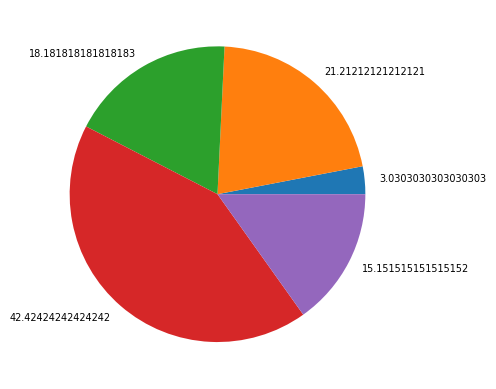

In [20]:
with fps.USGSPlot():
    
    plt.pie(betwor,
           labels=betwor.values)
plt.show()

/var/folders/gs/23hp3rd15qd6tyrfwt0r90qxz48f2r/T/ipykernel_99074/1516913487.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['C'].set_yticklabels([f'{i._text}%' for i in ax['C'].get_yticklabels()])


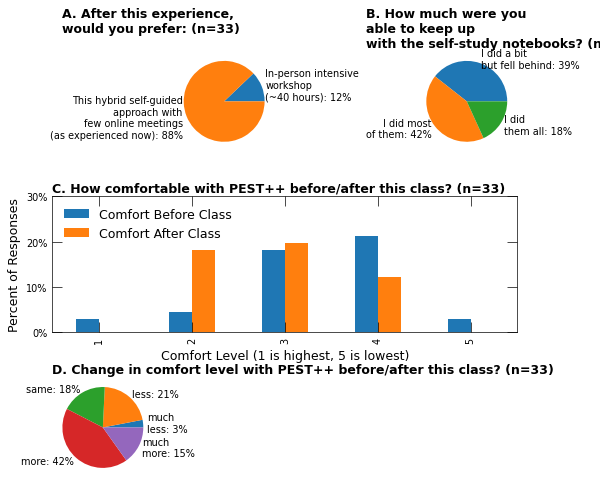

In [21]:
n=len(df)
with fps.USGSPlot():
    fig, ax = plt.subplot_mosaic(
        '''
        .A.B
        CCCC
        D...
        '''
        , figsize=(6,6))
    ax['B'].pie(nbs ,labels=[f'{i}: {j:.0f}%' for i,j in zip(nbs.index,nbs.values)])
    fps.heading(letter='B',x=-.5,ax=ax['B'], heading=f'How much were you \nable to keep up\nwith the self-study notebooks? (n={n})')

    ax['A'].pie(inperson ,labels=[f'{i}: {j:.0f}%' for i,j in zip(inperson.index,inperson.values)])
    fps.heading(letter='A',x=-1.1,ax=ax['A'], heading=f'After this experience,\nwould you prefer: (n={n})\n')

    b4_aft.plot.bar(ax=ax['C'])
    fps.heading(letter='C',ax=ax['C'], 
                heading=f'How comfortable with PEST++ before/after this class? (n={n})')
    ax['C'].set_ylim([0,60])
    ax['C'].set_yticklabels([f'{i._text}%' for i in ax['C'].get_yticklabels()])
    ax['C'].set_ylabel('Percent of Responses')
    ax['C'].set_xlabel('Comfort Level (1 is highest, 5 is lowest)')
    # ax[1].grid()
    fps.heading(letter='D',ax=ax['D'], 
                heading=f'Change in comfort level with PEST++ before/after this class? (n={n})')
    ax['D'].pie(betwor,
           labels=[f'{i}: {j:.0f}%' for i,j in zip(betwor.index,betwor.values)])
    plt.savefig('responses.png',dpi=450, bbox_inches='tight')
plt.show()

In [22]:
betwor

much\nless     3.030303
less          21.212121
same          18.181818
more          42.424242
much\nmore    15.151515
Name: Timestamp, dtype: float64

In [23]:
[print(i) for i in df.dropna(subset='Please provide feedback that we can use to improve the GMDSI educational experience including the materials and the format and execution of this 5-week experience.')[
'Please provide feedback that we can use to improve the GMDSI educational experience including the materials and the format and execution of this 5-week experience.'
]]

Specific to these workshops a bit more on presenting results and interpretation would have been great. Explicitly stating what conclusions can be made from the examples and what cannot. Linking things back to changes in input files is also a useful reminder to people of what the scripts are actually doing.
Subcutaneous administration
That training was truly fantastic! A lot to digest and unfortunatly not enough available time for me to digest it all. But with all the very well documented notebooks, I'll review it at my own pace and will integrate PEST++ in my routine workflow. Thanks heaps for organising the training.    
A brief dive into how to set up an unstructured grid PEST++ IES even it if it just a "here is the work-flow that could work", even if it isn't structured notebooks would appreciated. 
This course illustrated where I want to get to/aspirational goals and was presented really well, the course was very well laid out and the notebooks are an incredibly helpful resource. H

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]